In [1]:
import numpy as np
import pymc3 as pm
from pyei.two_by_two import TwoByTwoEI
from pyei.goodmans_er import GoodmansER
from pyei.goodmans_er import GoodmansERBayes
from pyei.data import Datasets
from pyei.plot_utils import tomography_plot

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/Users/karin/miniconda/envs/pyei_4/lib/python3.10/site-packages/aesara/link/jax/dispatch.py:87: UserWarning: JAX omnistaging couldn't be disabled: Disabling of omnistaging is no longer supported in JAX version 0.2.12 and higher: see https://github.com/google/jax/blob/main/design_notes/omnistaging.md.
  warnings.warn(f"JAX omnistaging couldn't be disabled: {e}")
/Users/karin/miniconda/envs/pyei_4/lib/python3.10/site-packages/pymc/sampling_jax.py:36: UserWarning: This module is experimental.
  warnings.warn("This module is experimental.")


In [2]:
%load_ext autoreload
%autoreload 2

# Demo of 2x2 models and plotting using Santa Clara data

We show examples of using and examining models available in `PyEi` using a sample data set with 42 precincts:

In [3]:
data = Datasets.Santa_Clara.to_dataframe()
X = np.array(data["pct_e_asian_vote"])
T = np.array(data["pct_for_hardy2"])
N = np.array(data["total2"])
demographic_group_name = "e_asian"
candidate_name="Hardy"
precinct_names = data['precinct']
data.head()

,precinct,total_turnout,total2,pct_for_hardy2,pct_for_kolstad2,pct_for_nadeem2,total5,pct_for_caserta5,pct_not_caserta5,pct_for_lacoursiere5,...,pct_for_park5,pct_not_park5,pct_asian_vote,pct_asian_pop,pct_ind_vote,pct_ind_pop,pct_e_asian_vote,pct_e_asian_pop,pct_non_asian_vote,pct_non_asian_pop
0,4201,712,658,0.246201,0.431611,0.322188,642,0.447041,0.552960,0.305296,...,0.247664,0.752336,0.054775,0.117369,0.008427,0.028632,0.046348,0.088736,0.945225,0.882631
1,4208,400,380,0.328947,0.431579,0.239474,379,0.456464,0.543536,0.192612,...,0.350923,0.649076,0.197500,0.214389,0.060000,0.075990,0.137500,0.138399,0.802500,0.785611
2,4211,609,549,0.251366,0.384335,0.364299,542,0.492620,0.507380,0.250922,...,0.256458,0.743542,0.123153,0.202214,0.042693,0.046066,0.080460,0.156147,0.876847,0.797786
3,4215,623,573,0.258290,0.371728,0.369982,558,0.431900,0.568100,0.344086,...,0.224014,0.775986,0.109149,0.162014,0.032103,0.040379,0.077047,0.121635,0.890851,0.837986
4,4217,399,359,0.281337,0.406685,0.311978,355,0.425352,0.574648,0.326761,...,0.247887,0.752113,0.142857,0.254478,0.027569,0.063619,0.115288,0.190859,0.857143,0.745522


<AxesSubplot:xlabel='voter pref of e_asian for Hardy', ylabel='voter pref of non-e_asian for Hardy'>

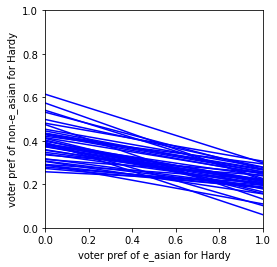

In [4]:
tomography_plot(X,T, demographic_group_name, candidate_name)

## Fitting a modified version of the model from King 1999

This model uses different priors than from King '99: Pareto and uniform hyperparameters are used to perform partial pooling over beta distributions for the groups. The likelihood is the same (binomial) distribution. See, for example [Hierarchical Partial Pooling for Repeated Binary Trials](https://mc-stan.org/rstanarm/articles/pooling.html) for details of this prior structure.

In [5]:
ei = TwoByTwoEI(model_name="king99_pareto_modification", pareto_scale=8, pareto_shape=2)
ei.fit(X, T, N, demographic_group_name=demographic_group_name, candidate_name=candidate_name, precinct_names=precinct_names)
print(ei.summary())

/Users/karin/miniconda/envs/pyei_4/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Compiling...


/Users/karin/miniconda/envs/pyei_4/lib/python3.10/site-packages/pymc/aesaraf.py:996: UserWarning: The parameter 'updates' of aesara.function() expects an OrderedDict, got <class 'dict'>. Using a standard dictionary here results in non-deterministic behavior. You should use an OrderedDict if you are using Python 2.7 (collections.OrderedDict for older python), or use a list of (shared, update) pairs. Do not just convert your dictionary to this type before the call as the conversion will still be non-deterministic.
  aesara_function = aesara.function(


Compilation time =  0:00:21.290745
Sampling...


Compiling.. :   0%|                                                       | 0/2500 [00:00<?, ?it/s]

  0%|                                                                     | 0/2500 [00:00<?, ?it/s]

Compiling.. :   0%|                                                       | 0/2500 [00:00<?, ?it/s]


  0%|                                                                     | 0/2500 [00:00<?, ?it/s]


Compiling.. :   0%|                                                       | 0/2500 [00:00<?, ?it/s]

Running chain 1:   0%|                                                    | 0/2500 [00:45<?, ?it/s]


Running chain 1:   5%|██                                       | 125/2500 [00:45<00:12, 190.58it/s]

Running chain 2:   5%|██                                       | 125/2500 [00:46<00:15, 155.75it/s]


Running chain 0:  10%|████                                     | 250/2500 [00:46<00:09, 236.82it/s]

Running chain 2:  10%|████                                     | 250/2500 [00:46<00:10,

Sampling time =  0:01:19.533817
Transforming variables...
Transformation time =  0:00:01.190733
Model: king99_pareto_modification
        Computed from the raw b_i samples by multiplying by population and then getting
        the proportion of the total pop (total pop=summed across all districts):
        The posterior mean for the district-level voting preference of
        e_asian for Hardy is
        0.805
        The posterior mean for the district-level voting preference of
        non-e_asian for Hardy is
        0.245
        95% equal-tailed Bayesian credible interval for district-level voting preference of
        e_asian for Hardy is
        [0.59292198 0.96681749]
        95% equal-tailed Bayesian credible interval for district-level voting preference of
        non-e_asian for Hardy is
        [0.21711191 0.27912284]
        


We can also pass to the fit() function additional keyword arguments for the sampler, such as:

- draws - the number of samples to draw
- chains - the number of chains
- tune - number of iteration to tune
- cores - number of chains to run in parallel

(see https://docs.pymc.io/api/inference.html sampling.sample for more)
E.g.:

In [6]:
ei = TwoByTwoEI(model_name="king99_pareto_modification", pareto_scale=8, pareto_shape=2)
ei.fit(X, T, N, demographic_group_name=demographic_group_name, candidate_name=candidate_name, precinct_names=precinct_names, draws=1200, tune=3000, target_accept=.99)
print(ei.summary())

Compiling...


/Users/karin/miniconda/envs/pyei_4/lib/python3.10/site-packages/pymc/aesaraf.py:996: UserWarning: The parameter 'updates' of aesara.function() expects an OrderedDict, got <class 'dict'>. Using a standard dictionary here results in non-deterministic behavior. You should use an OrderedDict if you are using Python 2.7 (collections.OrderedDict for older python), or use a list of (shared, update) pairs. Do not just convert your dictionary to this type before the call as the conversion will still be non-deterministic.
  aesara_function = aesara.function(


Compilation time =  0:00:15.741747
Sampling...


Compiling.. :   0%|                                                       | 0/4200 [00:00<?, ?it/s]

  0%|                                                                     | 0/4200 [00:00<?, ?it/s]

Compiling.. :   0%|                                                       | 0/4200 [00:00<?, ?it/s]


  0%|                                                                     | 0/4200 [00:00<?, ?it/s]


Running chain 1:   0%|                                                    | 0/4200 [00:25<?, ?it/s]

Running chain 2:   0%|                                                    | 0/4200 [00:25<?, ?it/s]


Running chain 1:   5%|██                                       | 210/4200 [00:26<00:16, 244.59it/s]

Running chain 2:   5%|██                                       | 210/4200 [00:26<00:18, 218.78it/s]


Running chain 0:   5%|██                                       | 210/4200 [00:26<00:21, 186.73it/s]

Running chain 0:  10%|████                                     | 420/4200 [00:26<00:14,

Sampling time =  0:00:42.293633
Transforming variables...
Transformation time =  0:00:00.940591
Model: king99_pareto_modification
        Computed from the raw b_i samples by multiplying by population and then getting
        the proportion of the total pop (total pop=summed across all districts):
        The posterior mean for the district-level voting preference of
        e_asian for Hardy is
        0.821
        The posterior mean for the district-level voting preference of
        non-e_asian for Hardy is
        0.242
        95% equal-tailed Bayesian credible interval for district-level voting preference of
        e_asian for Hardy is
        [0.60870148 0.97595988]
        95% equal-tailed Bayesian credible interval for district-level voting preference of
        non-e_asian for Hardy is
        [0.21529179 0.27780076]
        


### Plotting features for this and any model involving posterior samples:

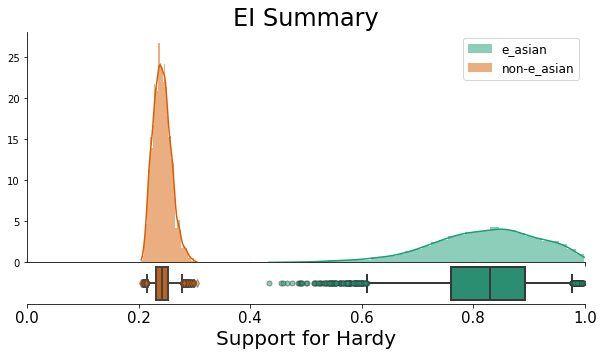

In [7]:
ax = ei.plot()

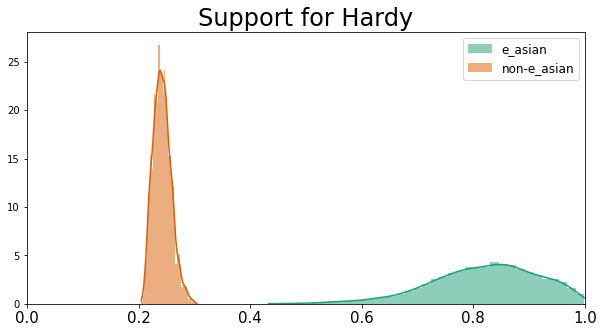

In [8]:
ax = ei.plot_kde()

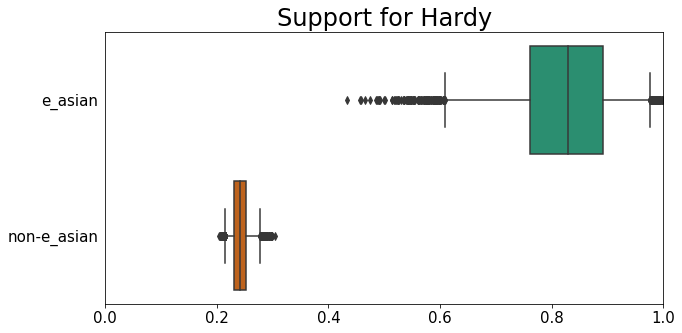

In [9]:
ax = ei.plot_boxplot()

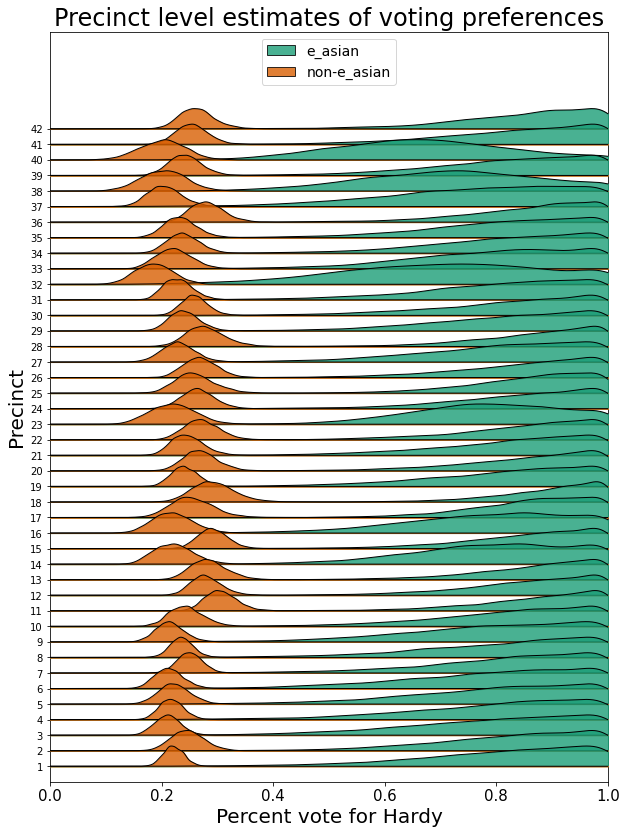

In [10]:
ax = ei.precinct_level_plot(alpha=0.8)

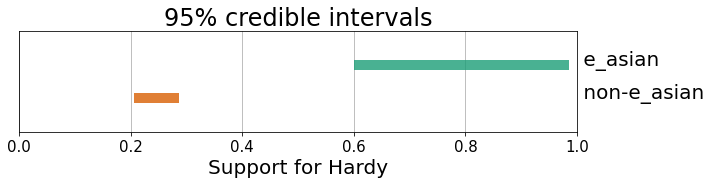

In [11]:
ax = ei.plot_intervals()

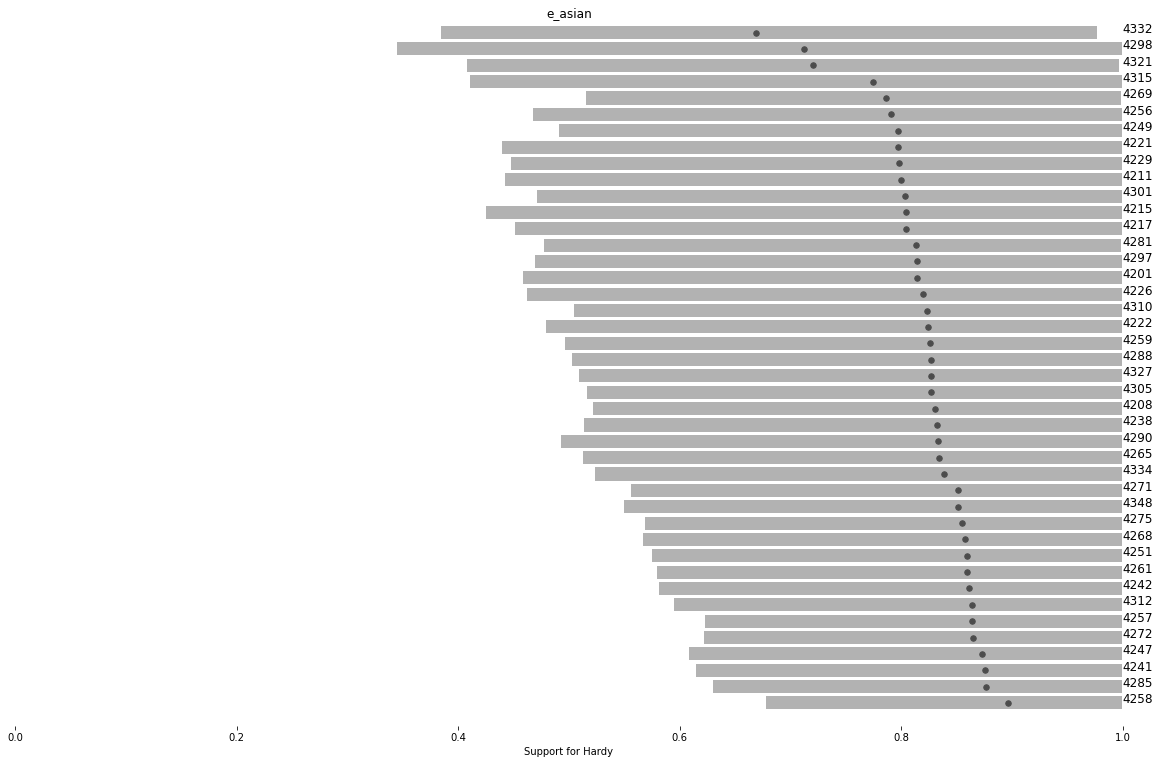

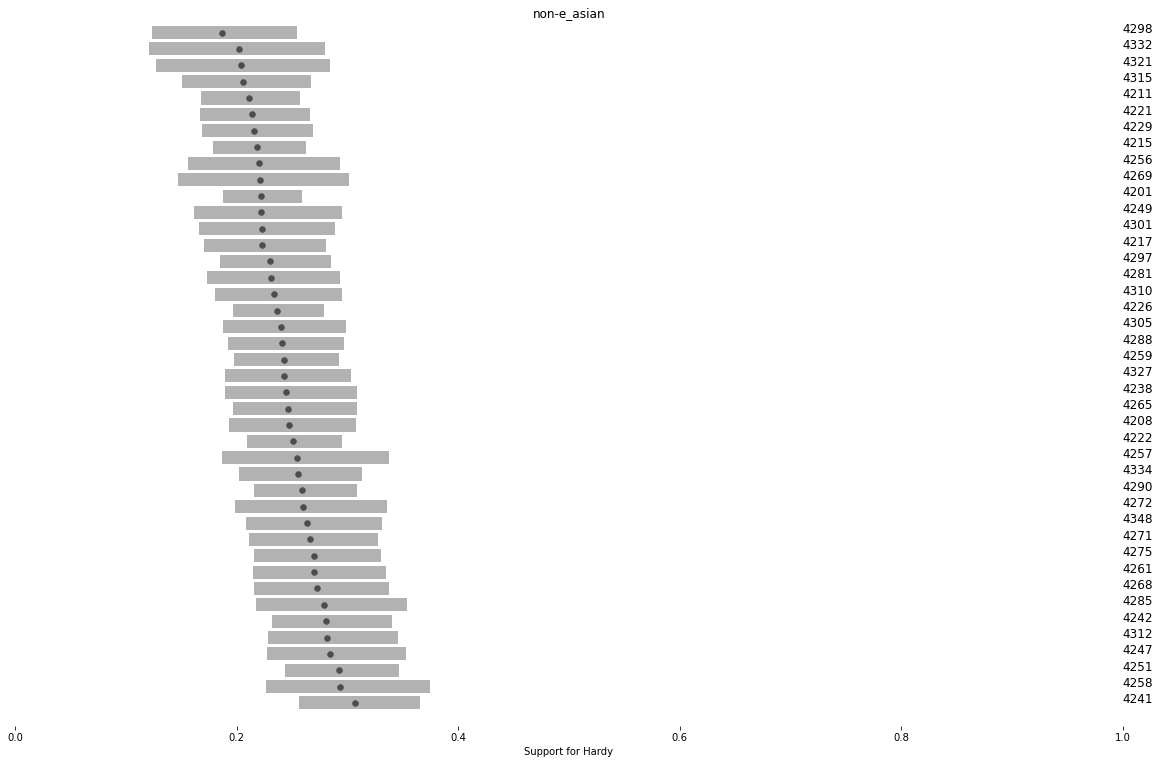

In [12]:
e_asian_ax, non_e_asian_ax = ei.plot_intervals_by_precinct()

### Examine polarization / differences between groups' voting preferences

### a) probability that the difference is above a certain threshold

In [13]:
ei.polarization_report(threshold=0.4)

There is a 93.5% probability that the difference between the groups' preferences for Hardy (e_asian -  non-e_asian) is more than 0.40.


93.52083333333333

In [14]:
ei.polarization_report(threshold=-0.4, reference_group=1)

There is a 6.5% probability that the difference between the groups' preferences for Hardy (non-e_asian -  e_asian) is more than -0.40.


6.479166666666667

In [15]:
ei.polarization_report(threshold=0.4, verbose=False)

93.52083333333333

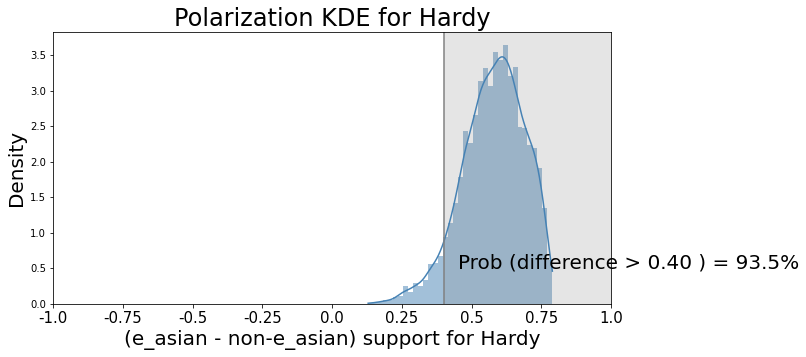

In [16]:
ax = ei.plot_polarization_kde(threshold=0.4, show_threshold=True) #set show_threshold to false to just view the kde

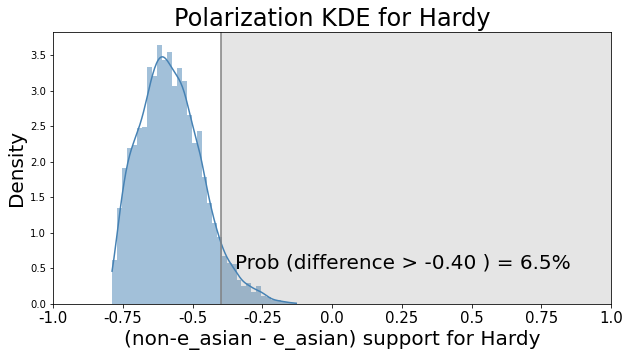

In [17]:
ax = ei.plot_polarization_kde(threshold=-0.4, show_threshold=True, reference_group=1)

### b) find threshold for a desired probability level

In [18]:
ei.polarization_report(percentile=95, verbose=True)

There is a 95% probability that the difference between the groups' preferences for Hardy (e_asian - non-e_asian) is between [0.33, 0.76].


(0.33144337063136714, 0.759367146817618)

In [19]:
ei.polarization_report(percentile=95, verbose=True, reference_group=1)

There is a 95% probability that the difference between the groups' preferences for Hardy (non-e_asian - e_asian) is between [-0.76, -0.33].


(-0.7593671468176181, -0.33144337063136714)

In [20]:
ei.polarization_report(percentile=95, verbose=False)

(0.33144337063136714, 0.759367146817618)

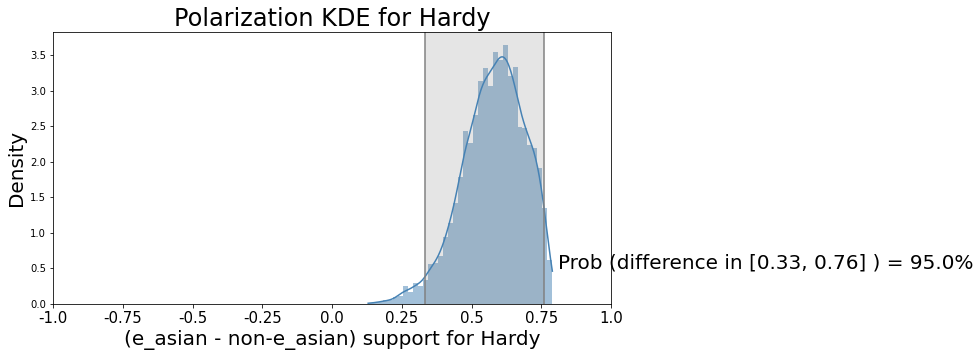

In [21]:
ax = ei.plot_polarization_kde(percentile=95, show_threshold=True)

## Summary features

In [22]:
print(ei.summary())

Model: king99_pareto_modification
        Computed from the raw b_i samples by multiplying by population and then getting
        the proportion of the total pop (total pop=summed across all districts):
        The posterior mean for the district-level voting preference of
        e_asian for Hardy is
        0.821
        The posterior mean for the district-level voting preference of
        non-e_asian for Hardy is
        0.242
        95% equal-tailed Bayesian credible interval for district-level voting preference of
        e_asian for Hardy is
        [0.60870148 0.97595988]
        95% equal-tailed Bayesian credible interval for district-level voting preference of
        non-e_asian for Hardy is
        [0.21529179 0.27780076]
        


### Posterior mean for district-wide voting preferences (mean of [precinct samples weighted by population]):

In [23]:
posterior_mean_voting_prefs =ei.posterior_mean_voting_prefs
print(demographic_group_name, " support for ", candidate_name, posterior_mean_voting_prefs[0])
print("non-",demographic_group_name, " support for ", candidate_name, posterior_mean_voting_prefs[1])


e_asian  support for  Hardy 0.8209414013169308
non- e_asian  support for  Hardy 0.24229831575560717


### 95% equal-tailed credible intervals

In [24]:
credible_interval_95_mean_voting_prefs = ei.credible_interval_95_mean_voting_prefs
print(demographic_group_name, " support for ", candidate_name, credible_interval_95_mean_voting_prefs[0])
print("non-",demographic_group_name, " support for ", candidate_name, credible_interval_95_mean_voting_prefs[1])


e_asian  support for  Hardy [0.60870148 0.97595988]
non- e_asian  support for  Hardy [0.21529179 0.27780076]


### Precinct-level posterior means and credible intervals

In [25]:
precinct_posterior_means, precinct_credible_intervals = ei.precinct_level_estimates()
#precinct_posterior_means has shape num_precincts x 2 (groups) x 2 (candidates)
print(precinct_posterior_means[5][0][0]) # Estimated (posterior mean) support for the candidate from the group in precinct 5
#precinct_credible_intervals has shape num_precincts x 2 (groups) x 2 (candidates) x 2 (endpoints))
print(precinct_credible_intervals[5][0][0]) # 95% credible interval of support for the candidate from the group in precint 5

0.7974915402500776
[0.43972265 0.99912862]


## Accessing samples

Samples from the posterior distribution of district-wide voter preferences (calculated by weighting each set of precinct-level samples by the population and summing):

In [26]:
sampled_voting_prefs = ei.sampled_voting_prefs # ei.sampled_voting_prefs is samples of district-level voter preference: list of length 2
sampled_voting_prefs[0] #samples of district-wide support of specified group for specified candidate
sampled_voting_prefs[1] #samples of district-wide support of (complement of specified group) for specified candidate
sampled_voting_prefs[0].mean() #posterior mean
sampled_voting_prefs[1].mean() #posterior mean

0.24229831575560717

Precinct level samples of voting preferences:

In [28]:
precinct_num_of_interest = 5
ei.sim_trace["posterior"]["b_1"].shape # num_chains num_samples x num_precincts

print("calculate posterior mean for voter preference of ", demographic_group_name, " for ", candidate_name," in precinct ",precinct_num_of_interest )

# can extract and combine all chains e.g with sim_trace["posterior"]["b_1"].stack(all_draws=["chain", "draw"]).values.T
b_1_samples_all = ei.sim_trace["posterior"]["b_1"].stack(all_draws=["chain", "draw"]).values.T # num_samples_in_all_chains_total x num_precincts
b_1_samples_all[:, precinct_num_of_interest].mean() 

calculate posterior mean for voter preference of  e_asian  for  Hardy  in precinct  5


0.7974915402500795

Posterior samples for hyperparameters are also accessible.

In [32]:
ei.sim_trace["posterior"]["kappa_1"].shape # num_chains x num_samples

# Note: can combine into one chain and convert to an numpy array like:
ei.sim_trace["posterior"]["kappa_1"].stack(all_draws=["chain", "draw"]).values.T

array([13.61977868,  8.7134099 ,  9.43621424, ..., 11.75472368,
       30.81105573, 10.39371249])

## Accessing and visualizing the pymc the model

In [ ]:
model = ei.sim_model
pm.model_to_graphviz(model)

## Fitting the model from King 1999

This is a faithful representation of the model from King '99: all of the hyperparameters are exponentially distributed with a fixed lambda value. 

In [34]:
ei = TwoByTwoEI(
    "king99", lmbda=0.1
)  # king uses 0.5, but smaller lambdas seem more stable
ei.fit(X, T, N, demographic_group_name="e asian", candidate_name="Hardy")
print(ei.summary())

Compiling...


/Users/karin/miniconda/envs/pyei_4/lib/python3.10/site-packages/pymc/aesaraf.py:996: UserWarning: The parameter 'updates' of aesara.function() expects an OrderedDict, got <class 'dict'>. Using a standard dictionary here results in non-deterministic behavior. You should use an OrderedDict if you are using Python 2.7 (collections.OrderedDict for older python), or use a list of (shared, update) pairs. Do not just convert your dictionary to this type before the call as the conversion will still be non-deterministic.
  aesara_function = aesara.function(


Compilation time =  0:00:04.458427
Sampling...


Compiling.. :   0%|                                                       | 0/2500 [00:00<?, ?it/s]

  0%|                                                                     | 0/2500 [00:00<?, ?it/s]

Compiling.. :   0%|                                                       | 0/2500 [00:00<?, ?it/s]


  0%|                                                                     | 0/2500 [00:00<?, ?it/s]


Running chain 0:   0%|                                                    | 0/2500 [00:15<?, ?it/s]

Running chain 1:   0%|                                                    | 0/2500 [00:15<?, ?it/s]


Running chain 1:   5%|██                                       | 125/2500 [00:16<00:08, 285.49it/s]

Running chain 0:  10%|████                                     | 250/2500 [00:16<00:05, 403.54it/s]


Running chain 3:   5%|██                                       | 125/2500 [00:16<00:13, 179.19it/s]

Running chain 0:  15%|██████▏                                  | 375/2500 [00:16<00:05,

Sampling time =  0:00:26.074405
Transforming variables...
Transformation time =  0:00:00.071760
Model: king99
        Computed from the raw b_i samples by multiplying by population and then getting
        the proportion of the total pop (total pop=summed across all districts):
        The posterior mean for the district-level voting preference of
        e asian for Hardy is
        0.833
        The posterior mean for the district-level voting preference of
        non-e asian for Hardy is
        0.240
        95% equal-tailed Bayesian credible interval for district-level voting preference of
        e asian for Hardy is
        [0.60663726 0.97368463]
        95% equal-tailed Bayesian credible interval for district-level voting preference of
        non-e asian for Hardy is
        [0.21519827 0.2796605 ]
        


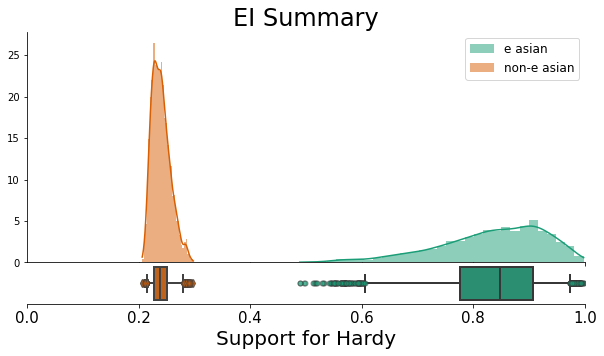

In [35]:
ei.plot();

<AxesSubplot:title={'center':'Precinct level estimates of voting preferences'}, xlabel='Percent vote for Hardy', ylabel='Precinct'>

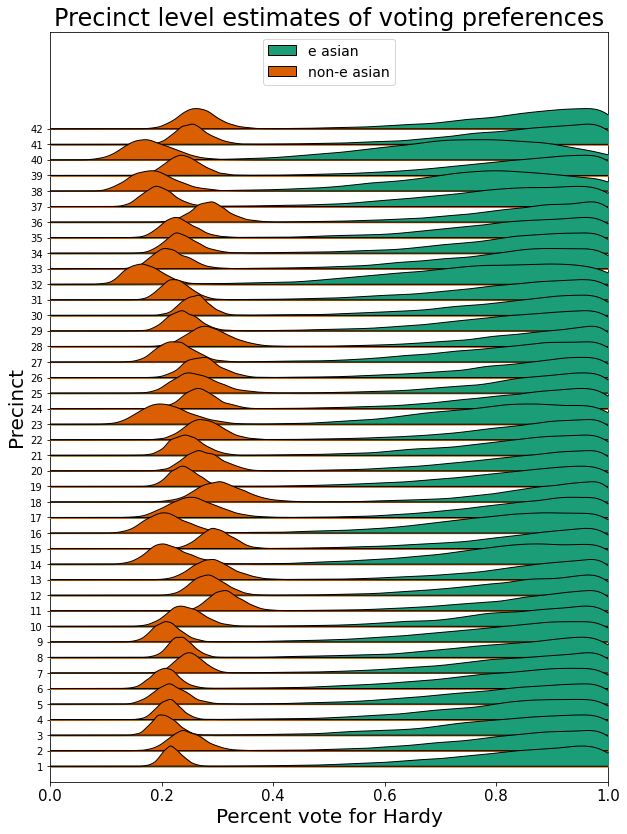

In [36]:
ei.precinct_level_plot()

## Fitting the model(s) based on (Wakefield, 2004)


In [ ]:
ei = TwoByTwoEI(model_name="wakefield_beta")
ei.fit(X, T, N, demographic_group_name=demographic_group_name, candidate_name=candidate_name, precinct_names=precinct_names)
print(ei.summary())

In [ ]:
ei.plot();

In [ ]:
ei.precinct_level_plot()

In [ ]:
# WARNING: THIS MODEL IS INTENDED TO MATCH THAT IN WAKEFIELD'S PAPER, BUT SEEMS TO PRESENT SAMPLING DIFFICULTIES
ei = TwoByTwoEI(model_name="wakefield_normal", mu0=0, mu1=0)
ei.fit(X, T, N, demographic_group_name=demographic_group_name, candidate_name=candidate_name, precinct_names=precinct_names)
print(ei.summary())

In [ ]:
# WARNING: THIS MODEL IS INTENDED TO MATCH THAT IN WAKEFIELD'S PAPER, BUT SEEMS TO PRESENT SAMPLING DIFFICULTIES
ei = TwoByTwoEI(model_name="wakefield_normal", mu0=0, mu1=0)
ei.fit(X, T, N, demographic_group_name=demographic_group_name, candidate_name=candidate_name, precinct_names=precinct_names)
print(ei.summary())

In [ ]:
ei.plot();

## Fitting Goodman's ecological regression

In [ ]:
goodmans_er = GoodmansER().fit(
    X, T, demographic_group_name="e asian", candidate_name="Hardy"
)
print(goodmans_er.summary())

In [ ]:
goodmans_er.plot();

## Fitting a weighted version of Goodman's ecological regression

In [ ]:
goodmans_er = GoodmansER(is_weighted_regression="True")
goodmans_er.fit(X, T, N, demographic_group_name="e asian", candidate_name="Hardy")
print(goodmans_er.summary())

In [ ]:
goodmans_er.plot();

## Fitting a Bayesian version of Goodman's ecological regression

With uniform \[0,1\] priors over the voting preferences for each group. Options to weigh the precints based on population or not.

In [ ]:
bayes_goodman_ei = GoodmansERBayes("goodman_er_bayes", weighted_by_pop=True, sigma=1)
bayes_goodman_ei.fit(X, T, N, demographic_group_name=demographic_group_name, candidate_name=candidate_name)
print(bayes_goodman_ei.summary())

In [ ]:
bayes_goodman_ei.plot_kde()

In [ ]:
 x_vals, means, lower_bounds, upper_bounds = bayes_goodman_ei.compute_credible_int_for_line()

In [ ]:
import arviz as az
idata = az.from_pymc3(bayes_goodman_ei.sim_trace, model=bayes_goodman_ei.sim_model)

In [ ]:
idata

In [ ]:
idata.sample_stats.diverging

In [ ]:
az.stats.rhat(idata)